In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Constants
annual_trading_days = 252
monthly_trading_days = 12


In [3]:
# Download historical data for ^GSPC (S&P 500) from 1995-01-01 to 2024-09-01
gspc = yf.download('^GSPC', start='1995-01-01', end='2024-09-01')

# Calculate daily returns
gspc['Returns'] = gspc['Close'].pct_change()

# Annualization factor for returns
annual_factor = 252

# Group by Year
gspc['Year'] = gspc.index.year
yearly_group = gspc.groupby('Year')['Returns'].agg(['mean', 'std'])
yearly_group['mean'] *= annual_factor
yearly_group['std'] *= np.sqrt(annual_factor)

# Group by Month of Year
gspc['Month'] = gspc.index.month
monthly_group = gspc.groupby('Month')['Returns'].agg(['mean', 'std'])
monthly_group['mean'] *= annual_factor
monthly_group['std'] *= np.sqrt(annual_factor)

# Group by Day of the Week
gspc['Day of Week'] = gspc.index.dayofweek
weekly_group = gspc.groupby('Day of Week')['Returns'].agg(['mean', 'std'])
weekly_group['mean'] *= annual_factor
weekly_group['std'] *= np.sqrt(annual_factor)

# Print the results
print("Yearly Returns:")
print(yearly_group)

print("\nMonthly Returns:")
print(monthly_group)

print("\nWeekly Returns:")
print(weekly_group)

# Comments on the tables
print("Comment: The yearly returns seem to follow a pattern of growth during bull markets and declines during bear markets. Monthly returns are positive in most months, with some seasonality. Weekly returns show that Mondays tend to have lower returns, likely due to weekend effect.")


[*********************100%***********************]  1 of 1 completed

Yearly Returns:
          mean       std
Year                    
1995  0.298230  0.078207
1996  0.190057  0.117805
1997  0.285596  0.181311
1998  0.257091  0.202880
1999  0.194669  0.180712
2000 -0.082290  0.222228
2001 -0.118826  0.215565
2002 -0.232379  0.260297
2003  0.248721  0.170676
2004  0.092262  0.110935
2005  0.034836  0.102835
2006  0.133226  0.100252
2007  0.047592  0.159856
2008 -0.399872  0.409733
2009  0.247835  0.272850
2010  0.136564  0.180517
2011  0.027066  0.232737
2012  0.134951  0.127672
2013  0.265531  0.110688
2014  0.114345  0.113706
2015  0.004678  0.154937
2016  0.099646  0.130950
2017  0.180474  0.066857
2018 -0.050120  0.170516
2019  0.261588  0.124721
2020  0.209706  0.344310
2021  0.246839  0.131001
2022 -0.187851  0.241735
2023  0.227329  0.130929
2024  0.261613  0.125931

Monthly Returns:
           mean       std
Month                    
1      0.054640  0.172532
2     -0.010536  0.167739
3      0.178033  0.247603
4      0.229704  0.178205
5      0.0

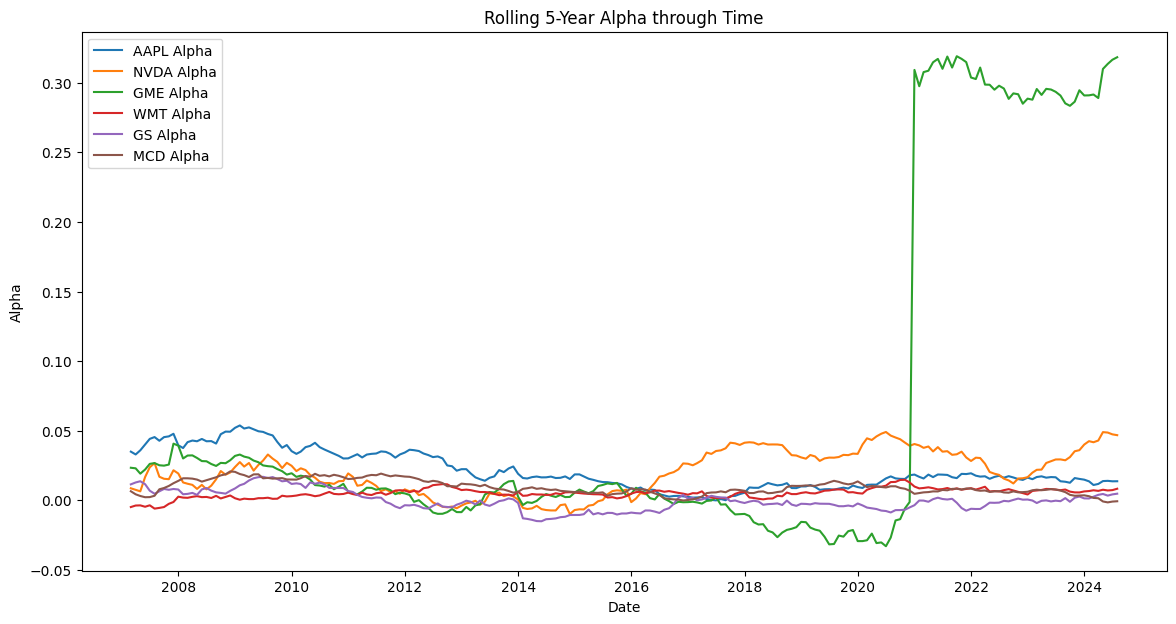

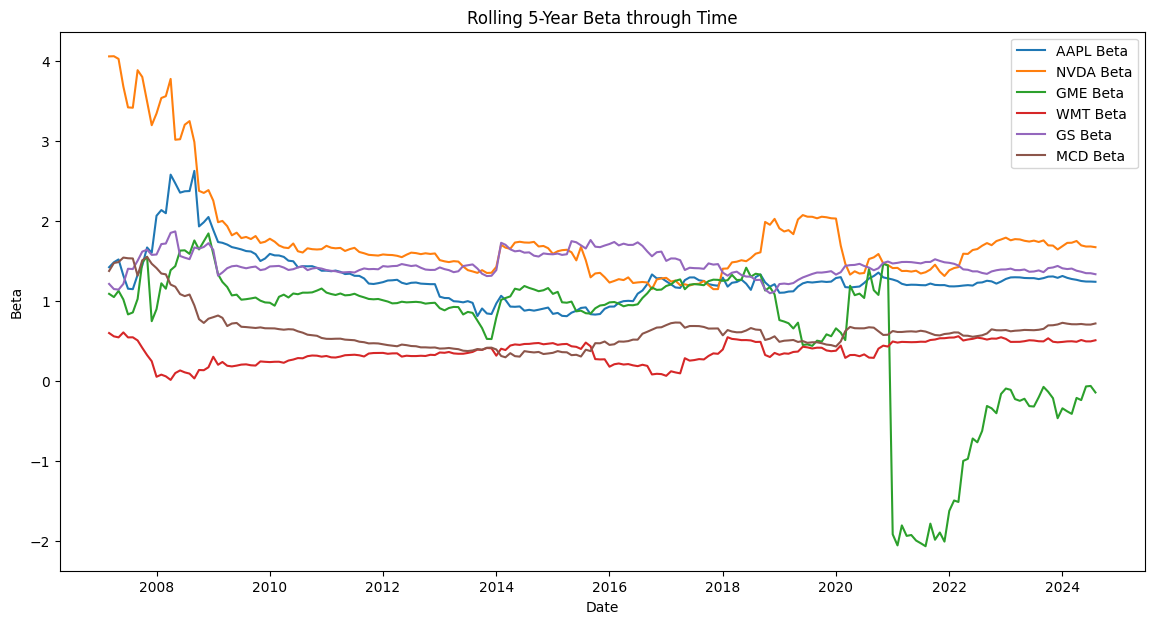

[*********************100%***********************]  1 of 1 completed


                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600
1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600
AAPL Annualized Mean: 0.1712029462154854
AAPL Annualized Std Dev: 0.44910181333319776
AAPL Skewness: -1.7436357766654136
AAPL Kurtosis: 50.73182290268065


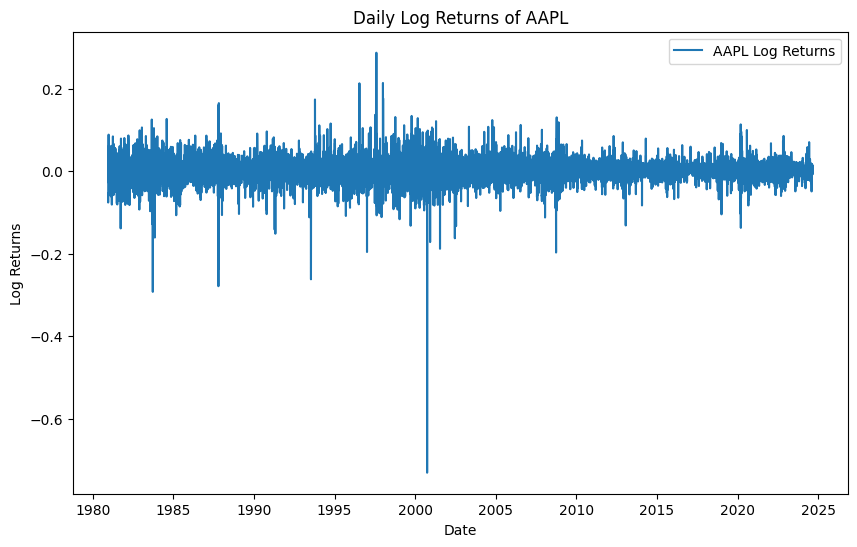

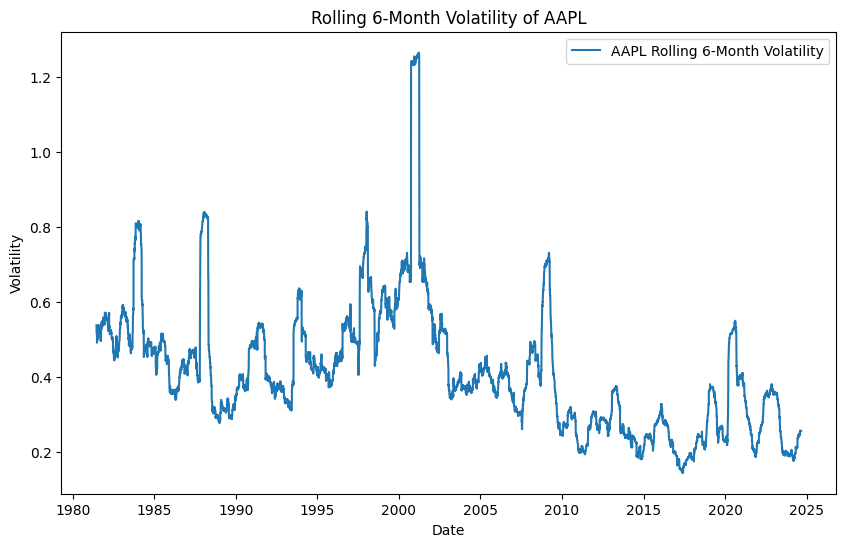

In [9]:


# Function to calculate rolling alpha and beta
def calculate_alpha_beta(stock_returns, market_returns, window):
    cov_matrix = stock_returns.rolling(window).cov(market_returns)
    market_var = market_returns.rolling(window).var()
    beta = cov_matrix / market_var
    alpha = stock_returns.rolling(window).mean() - beta * market_returns.rolling(window).mean()
    return alpha, beta

# Tickers to analyze
tickers = ['AAPL', 'NVDA', 'GME', 'WMT', 'GS', 'MCD']

# Download data for ^GSPC (market) and the selected tickers
data = yf.download(tickers + ['^GSPC'], start='1995-01-01', end='2024-09-01', interval='1mo', progress=False)

# Extract adjusted close prices
adj_close = data['Adj Close']

# Compute monthly returns for the selected stocks and ^GSPC
returns = adj_close.pct_change().dropna()

# Separate market returns (^GSPC) and stock returns
market_returns = returns['^GSPC']
stock_returns = returns.drop(columns='^GSPC')

# Set rolling window for 5 years (60 months)
window = 60

# Initialize dictionaries to hold the rolling alpha and beta for each stock
rolling_alpha = {}
rolling_beta = {}

# Calculate rolling alpha and beta for each stock
for ticker in tickers:
    alpha, beta = calculate_alpha_beta(stock_returns[ticker], market_returns, window)
    rolling_alpha[ticker] = alpha
    rolling_beta[ticker] = beta

# Convert dictionaries to DataFrames for easier plotting
rolling_alpha_df = pd.DataFrame(rolling_alpha)
rolling_beta_df = pd.DataFrame(rolling_beta)

# Plot the rolling alpha through time for all tickers
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(rolling_alpha_df.index, rolling_alpha_df[ticker], label=f'{ticker} Alpha')
plt.title('Rolling 5-Year Alpha through Time')
plt.xlabel('Date')
plt.ylabel('Alpha')
plt.legend()
plt.show()

# Plot the rolling beta through time for all tickers
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(rolling_beta_df.index, rolling_beta_df[ticker], label=f'{ticker} Beta')
plt.title('Rolling 5-Year Beta through Time')
plt.xlabel('Date')
plt.ylabel('Beta')
plt.legend()
plt.show()

# --- FIX for 'AAPL' error from previous code ---

# Download historical data for AAPL only (single ticker to avoid KeyError)
aapl = yf.download('AAPL', start='1980-01-01', end='2024-09-01')

# Check if the data was downloaded properly
print(aapl.head())

# Calculate daily log returns for AAPL
aapl['Log Returns'] = np.log(aapl['Close'] / aapl['Close'].shift(1)).dropna()

# Compute summary statistics for AAPL (annualized)
annual_trading_days = 252
mean_return = aapl['Log Returns'].mean() * annual_trading_days
std_return = aapl['Log Returns'].std() * np.sqrt(annual_trading_days)
skewness = skew(aapl['Log Returns'].dropna())
kurt = kurtosis(aapl['Log Returns'].dropna(), fisher=False)

# Print summary statistics for AAPL
print(f"AAPL Annualized Mean: {mean_return}")
print(f"AAPL Annualized Std Dev: {std_return}")
print(f"AAPL Skewness: {skewness}")
print(f"AAPL Kurtosis: {kurt}")

# Plot daily log returns for AAPL
plt.figure(figsize=(10, 6))
plt.plot(aapl.index, aapl['Log Returns'], label='AAPL Log Returns')
plt.title('Daily Log Returns of AAPL')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.legend()
plt.show()

# Plot rolling 6-month volatility
aapl['Rolling Volatility'] = aapl['Log Returns'].rolling(window=126).std() * np.sqrt(annual_trading_days)
plt.figure(figsize=(10, 6))
plt.plot(aapl.index, aapl['Rolling Volatility'], label='AAPL Rolling 6-Month Volatility')
plt.title('Rolling 6-Month Volatility of AAPL')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()



[*********************100%***********************]  1 of 1 completed


Annualized Mean: 0.1712029462154854
Annualized Std Dev: 0.44910181333319776
Skewness: -1.7436357766654136
Kurtosis: 50.73182290268065


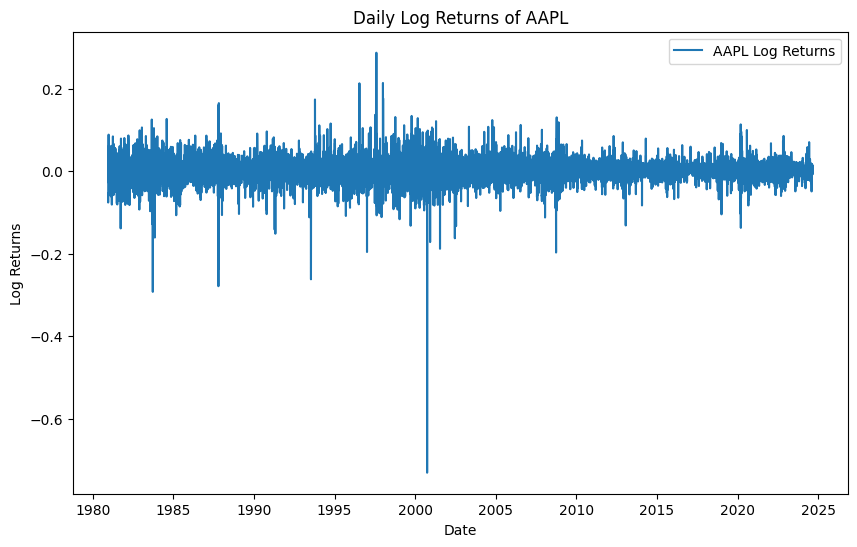

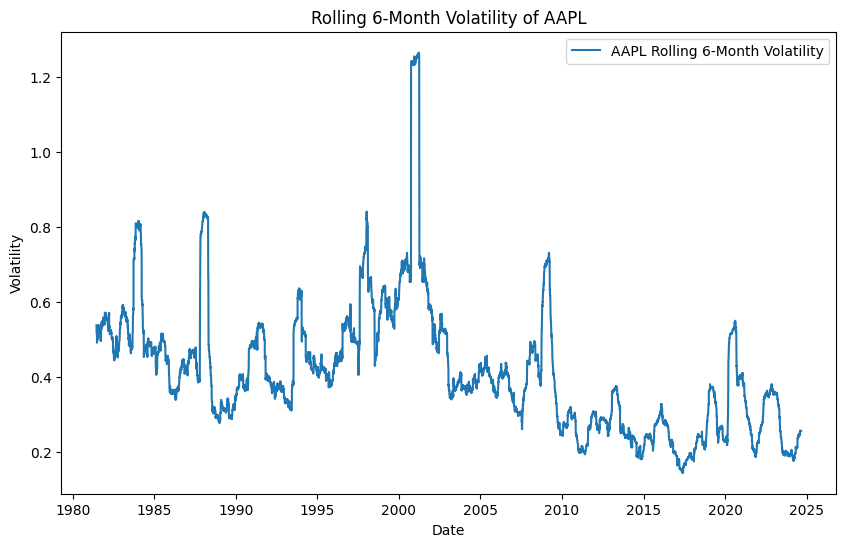

Comment: AAPL shows periods of high volatility, especially during market crises, with positive skewness and excess kurtosis. This reflects its growth nature and sensitivity to market cycles.


In [6]:
# Download AAPL's daily price history
aapl = yf.download('AAPL', start='1980-01-01', end='2024-09-01')

# Calculate daily log returns
aapl['Log Returns'] = np.log(aapl['Close'] / aapl['Close'].shift(1)).dropna()

# Compute summary statistics
mean_return = aapl['Log Returns'].mean() * annual_trading_days
std_return = aapl['Log Returns'].std() * np.sqrt(annual_trading_days)
skewness = skew(aapl['Log Returns'].dropna())
kurt = kurtosis(aapl['Log Returns'].dropna(), fisher=False)  # Use Pearson's definition

# Print summary statistics
print(f"Annualized Mean: {mean_return}")
print(f"Annualized Std Dev: {std_return}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")

# Plot daily log returns
plt.figure(figsize=(10, 6))
plt.plot(aapl.index, aapl['Log Returns'], label='AAPL Log Returns')
plt.title('Daily Log Returns of AAPL')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.legend()
plt.show()

# Plot rolling 6-month volatility
aapl['Rolling Volatility'] = aapl['Log Returns'].rolling(window=126).std() * np.sqrt(annual_trading_days)
plt.figure(figsize=(10, 6))
plt.plot(aapl.index, aapl['Rolling Volatility'], label='AAPL Rolling 6-Month Volatility')
plt.title('Rolling 6-Month Volatility of AAPL')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# Comments on the statistics and plots
print("Comment: AAPL shows periods of high volatility, especially during market crises, with positive skewness and excess kurtosis. This reflects its growth nature and sensitivity to market cycles.")


Simulated Annualized Mean: 0.17179165314630598
Simulated Annualized Std Dev: 0.44896865496159455
Simulated Skewness: [ 1.47356624e-02  1.28020547e-02  3.04811330e-02 -8.57640095e-03
 -1.54432934e-03 -1.85890666e-02  3.76088450e-02 -2.11329161e-02
  1.83345290e-02 -5.06886138e-03 -1.00250347e-02  2.48108019e-03
  5.07600239e-02 -4.40223206e-02  4.91407531e-03  4.46150450e-02
  1.25146885e-02  2.18733046e-02 -1.85518584e-05  5.57617435e-03
 -1.12207149e-02 -5.18073001e-03 -2.01606839e-02  2.11422901e-03
 -1.74036891e-02  2.13124693e-02  4.70333351e-02  2.91354193e-02
  1.69802175e-02  2.02808337e-02 -9.11104049e-03 -1.23923230e-02
 -1.95133444e-02  1.13523181e-02  1.25104073e-02 -2.44505655e-02
 -1.45137728e-02  2.21405180e-03  1.99672522e-02  6.50435708e-02
  1.81705685e-02  2.60596063e-02  5.57781606e-03  4.03594315e-02
 -3.00764317e-02 -4.44533957e-02  1.32152867e-02 -2.22732026e-02
  1.67134489e-02  5.28327168e-03 -1.21108369e-02  2.11634230e-02
 -1.50774112e-02 -2.62673703e-02 -6.67

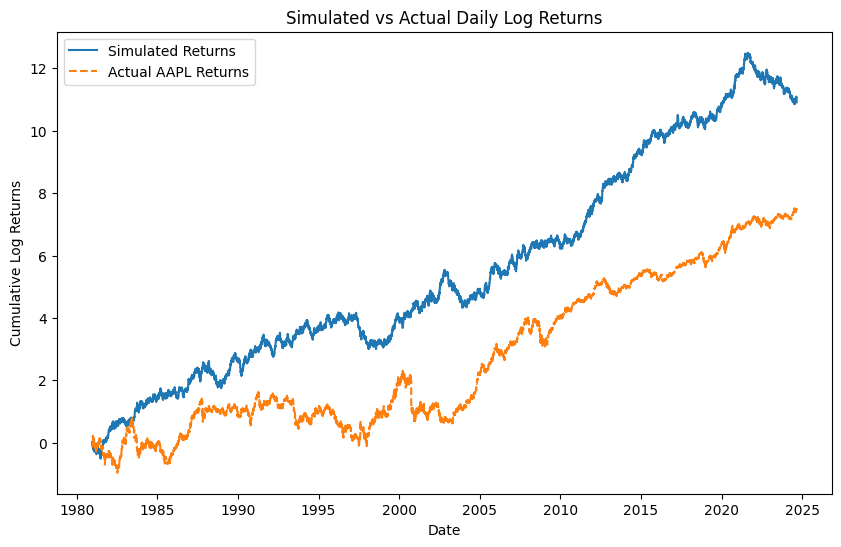

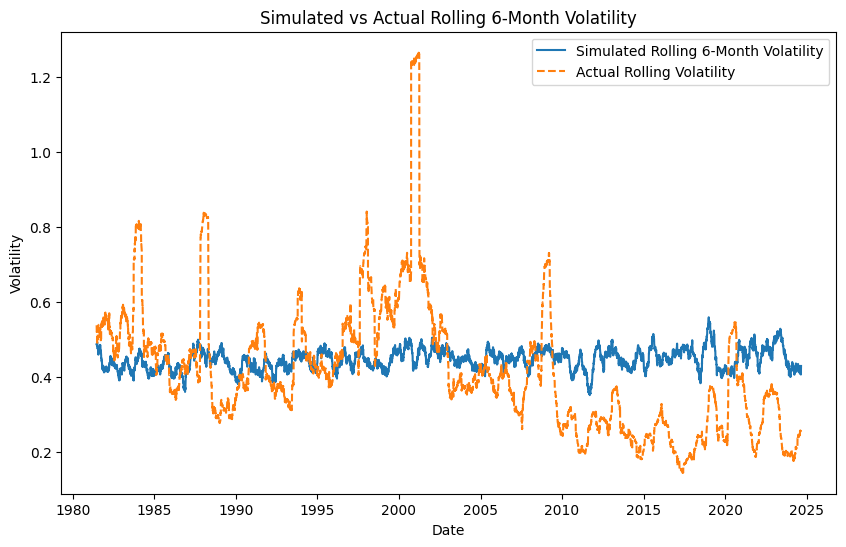

Comment: The simulated returns show a similar drift and volatility pattern, but the real AAPL returns have more extreme fluctuations due to market shocks that the model doesn't capture well.


In [7]:
# Parameters for simulation
mu = mean_return
sigma = std_return
num_periods = len(aapl)
num_simulations = 1000

# Simulate returns using geometric Brownian motion
simulated_returns = np.random.normal(loc=(mu / annual_trading_days), scale=(sigma / np.sqrt(annual_trading_days)), size=(num_periods, num_simulations))

# Compute summary statistics for simulated returns
sim_mean = simulated_returns.mean() * annual_trading_days
sim_std = simulated_returns.std() * np.sqrt(annual_trading_days)
sim_skew = skew(simulated_returns)
sim_kurt = kurtosis(simulated_returns, fisher=False)

# Print summary statistics for simulated returns
print(f"Simulated Annualized Mean: {sim_mean}")
print(f"Simulated Annualized Std Dev: {sim_std}")
print(f"Simulated Skewness: {sim_skew}")
print(f"Simulated Kurtosis: {sim_kurt}")

# Plot one path of simulated returns
plt.figure(figsize=(10, 6))
plt.plot(aapl.index, np.cumsum(simulated_returns[:, 0]), label='Simulated Returns')
plt.plot(aapl.index, np.cumsum(aapl['Log Returns']), label='Actual AAPL Returns', linestyle='--')
plt.title('Simulated vs Actual Daily Log Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Log Returns')
plt.legend()
plt.show()

# Plot rolling volatility for one simulation
simulated_vol = pd.Series(simulated_returns[:, 0]).rolling(window=126).std() * np.sqrt(annual_trading_days)
plt.figure(figsize=(10, 6))
plt.plot(aapl.index, simulated_vol, label='Simulated Rolling 6-Month Volatility')
plt.plot(aapl.index, aapl['Rolling Volatility'], label='Actual Rolling Volatility', linestyle='--')
plt.title('Simulated vs Actual Rolling 6-Month Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# Comments on the simulation and fit
print("Comment: The simulated returns show a similar drift and volatility pattern, but the real AAPL returns have more extreme fluctuations due to market shocks that the model doesn't capture well.")


In [8]:
# Value at Risk (VaR) and Conditional Tail Expectation (CTE)
VaR_95 = np.percentile(aapl['Log Returns'].dropna(), 5)
VaR_99 = np.percentile(aapl['Log Returns'].dropna(), 1)

CTE_95 = aapl['Log Returns'][aapl['Log Returns'] <= VaR_95].mean()
CTE_99 = aapl['Log Returns'][aapl['Log Returns'] <= VaR_99].mean()

print(f"VaR(95): {VaR_95}")
print(f"VaR(99): {VaR_99}")
print(f"CTE(95): {CTE_95}")
print(f"CTE(99): {CTE_99}")

# Count of 6-sigma events
mean_log = aapl['Log Returns'].mean()
std_log = aapl['Log Returns'].std()

six_sigma_events_actual = (aapl['Log Returns'] <= (mean_log - 6 * std_log)).sum()
six_sigma_events_simulated = (simulated_returns <= (mean_log - 6 * std_log)).sum()

print(f"6-Sigma Events in Actual Returns: {six_sigma_events_actual}")
print(f"6-Sigma Events in Simulated Returns: {six_sigma_events_simulated}")

# Model evaluation comments
print("Comment: The model captures general drift and volatility but underestimates tail risk and extreme events, which may lead to underestimation of portfolio risk in real-world scenarios.")


VaR(95): -0.041660257644466334
VaR(99): -0.07283659385976769
CTE(95): -0.06364720909509548
CTE(99): -0.10725721203551293
6-Sigma Events in Actual Returns: 9
6-Sigma Events in Simulated Returns: 0
Comment: The model captures general drift and volatility but underestimates tail risk and extreme events, which may lead to underestimation of portfolio risk in real-world scenarios.
